#### Análise Gráfica da Base de Dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("../Data/casas_londres_traduzido.csv")
df_tr = pd.read_csv("../Data/casas_londres_codificado.csv")

#### Correlação

In [6]:
corr_matrix = df_tr.corr()

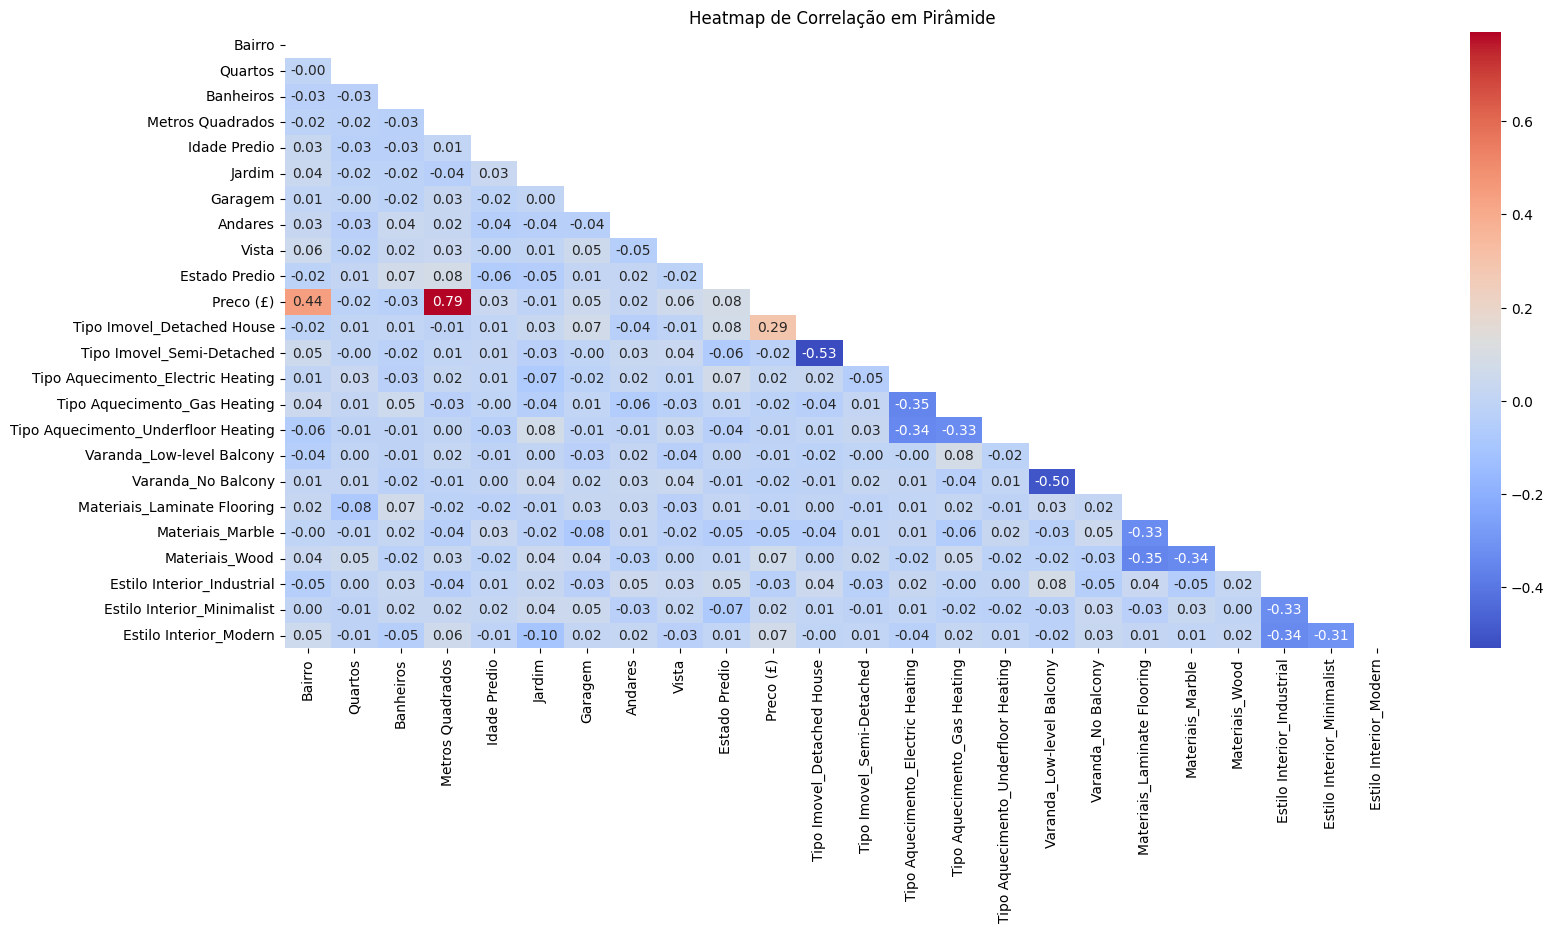

In [7]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar=True)
plt.title('Heatmap de Correlação em Pirâmide')
plt.show()

#### Análise de Colunas Numéricas

In [8]:
def criar_histograma(coluna):
    fig = px.histogram(df, x=coluna, nbins=100, title=f"Distribuição de {coluna}")
    fig.update_layout(bargap=0.1, xaxis_title=coluna, yaxis_title="Frequência")
    return fig

In [9]:
opcoes_colunas = ["Preco (£)", "Metros Quadrados", "Idade Predio"]
coluna_selecionada = "Preco (£)"

In [10]:
grafico = criar_histograma(coluna_selecionada)
grafico.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "restyle",
                    "args": [{"x": [df[coluna]]}],  
                    "label": coluna,
                }
                for coluna in opcoes_colunas
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "y": 1.2,
        }
    ]
)
grafico.show()

In [30]:
def criar_grafico_barras(coluna):
    agrupado = df[coluna].value_counts().reset_index()
    agrupado.columns = [coluna, "Frequência"]
    
    fig = px.bar(
        agrupado,
        x=coluna,
        y="Frequência",
        color=coluna,  
        title=f"Distribuição de {coluna}",
        labels={coluna: coluna, "Frequência": "Frequência"},
    )
    fig.update_layout(
        height=600,  
        xaxis=dict(
            tickmode='linear',
            dtick=1  
        ),
        showlegend=True,  
    )
    return fig

In [32]:
opcoes_colunas = ["Quartos", "Banheiros", "Andares"]  
coluna_selecionada = "Quartos"  

In [ ]:
grafico = criar_grafico_barras(coluna_selecionada)

grafico.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "restyle",
                    "args": [
                        {
                            "x": [df[coluna].value_counts().index],
                            "y": [df[coluna].value_counts().values],
                            "marker.color": [df[coluna].value_counts().index], 
                        }
                    ],
                    "label": coluna,
                }
                for coluna in opcoes_colunas
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "y": 1.2,
        }
    ]
)
grafico.show()

#### Análise de Colunas Categóricas

In [34]:
opcoes_colunas = list(df.select_dtypes(include='object').columns)
coluna_selecionada = "Bairro"

In [35]:
grafico = criar_grafico_barras(coluna_selecionada)

grafico.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "restyle",
                    "args": [
                        {
                            "x": [df[coluna].value_counts().index],
                            "y": [df[coluna].value_counts().values],
                            "marker.color": [df[coluna].value_counts().index],  # Atualiza cores
                        }
                    ],
                    "label": coluna,
                }
                for coluna in opcoes_colunas
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "y": 1.2,
        }
    ]
)
grafico.show()

#### Comparação com a Coluna Alvo

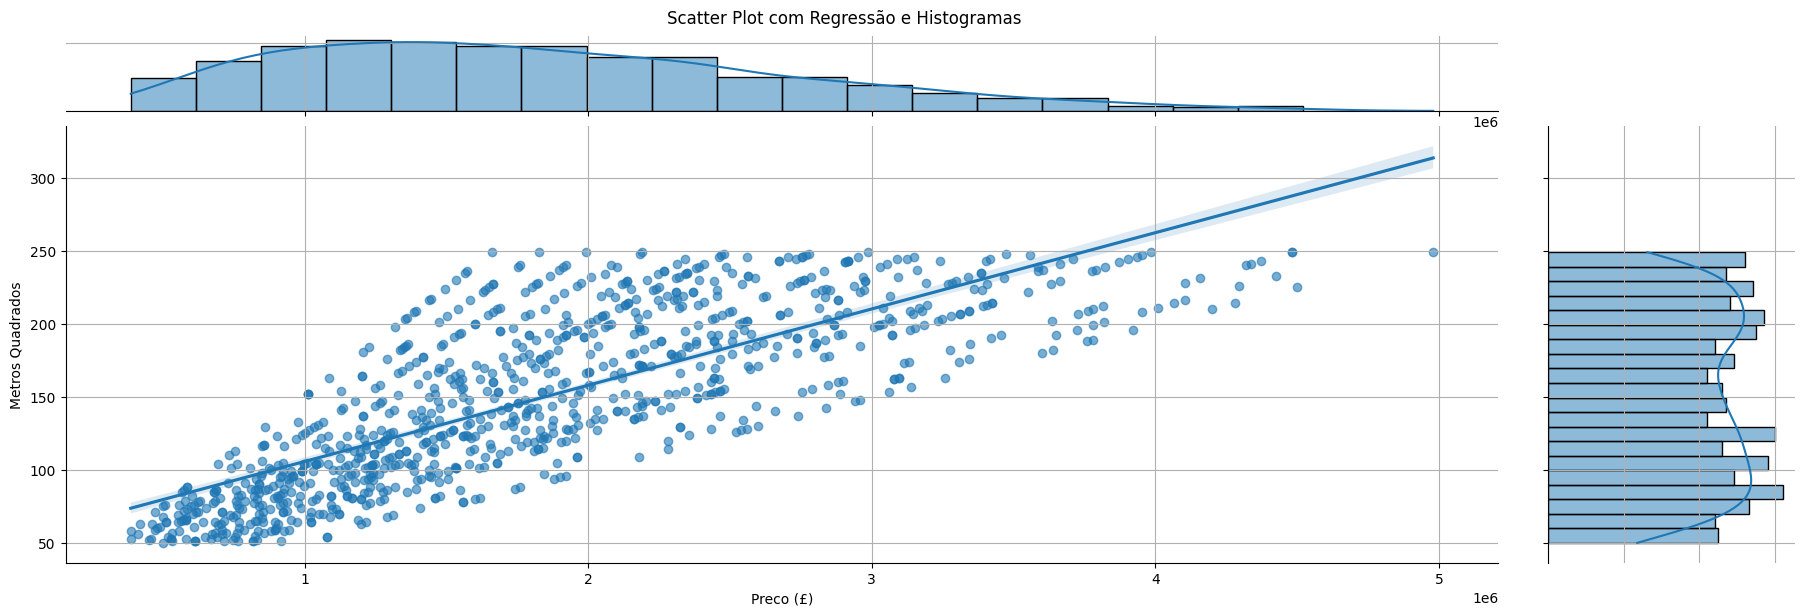

In [44]:
g = sns.jointplot(
    data=df,
    x="Preco (£)",
    y="Metros Quadrados",
    kind="reg",  
    marginal_kws={"bins": 20, "fill": True},  
    scatter_kws={"alpha": 0.6},  
)

g.fig.set_figheight(6)
g.fig.set_figwidth(20)

g.ax_joint.grid(True)
g.ax_marg_x.grid(True)
g.ax_marg_y.grid(True)

g.fig.suptitle("Scatter Plot com Regressão e Histogramas", y=1.02)
plt.show()

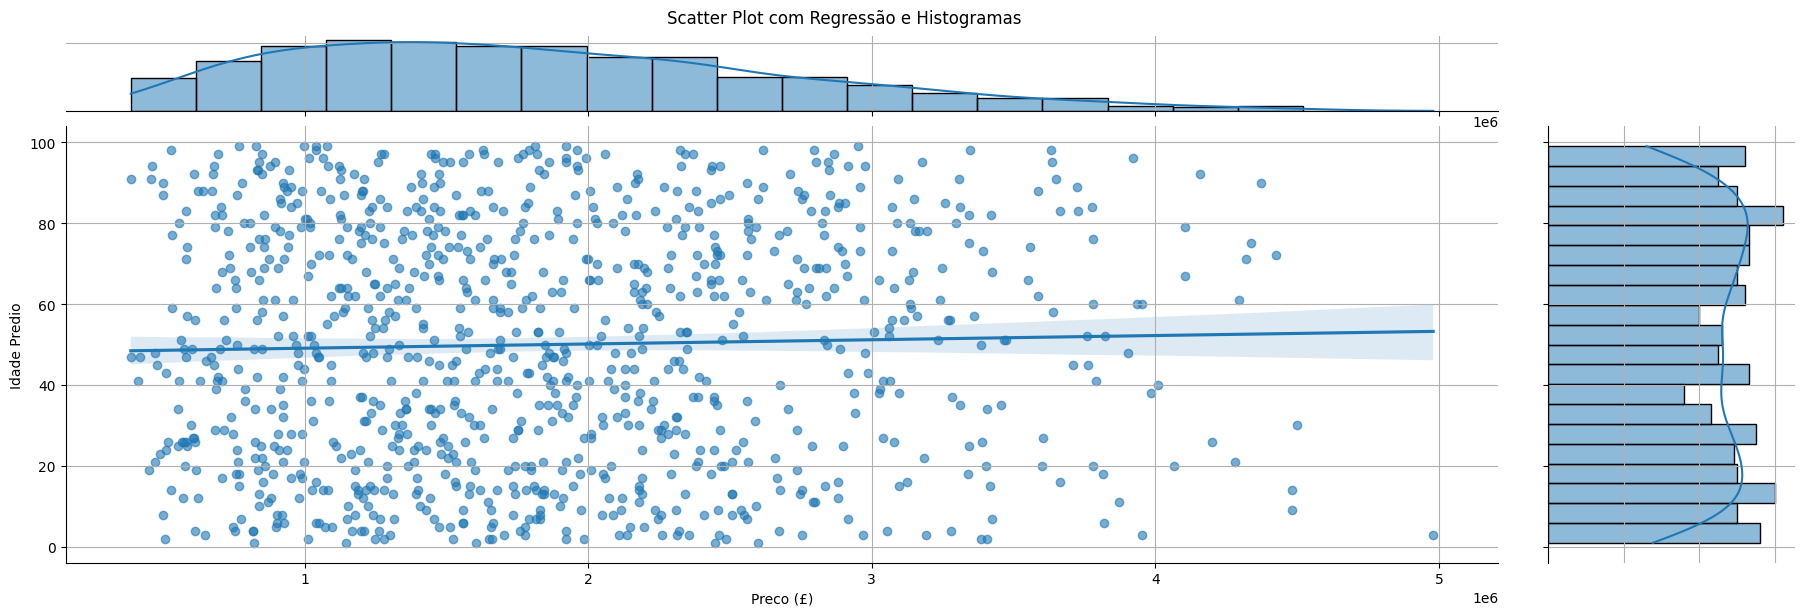

In [51]:
g = sns.jointplot(
    data=df,
    x="Preco (£)",
    y="Idade Predio",
    kind="reg",  
    marginal_kws={"bins": 20, "fill": True},  
    scatter_kws={"alpha": 0.6},  
)

g.fig.set_figheight(6)
g.fig.set_figwidth(20)

g.ax_joint.grid(True)
g.ax_marg_x.grid(True)
g.ax_marg_y.grid(True)

g.fig.suptitle("Scatter Plot com Regressão e Histogramas", y=1.02)
plt.show()

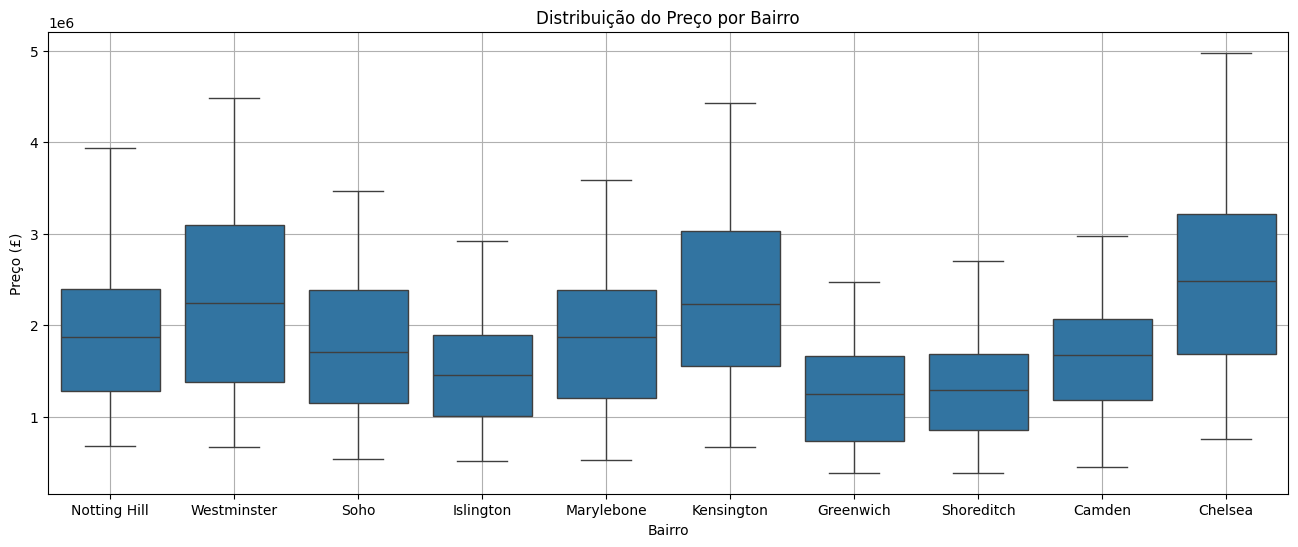

In [47]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    x="Bairro",  
    y="Preco (£)",  
    data=df,  
)

plt.title("Distribuição do Preço por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Preço (£)")
plt.grid(True)
plt.show()

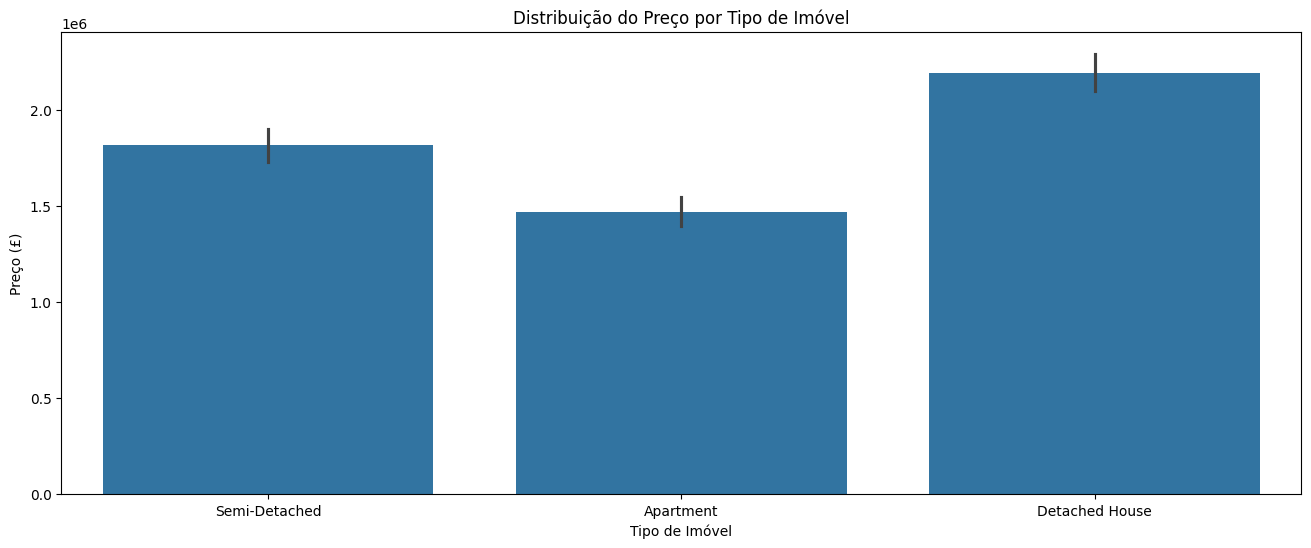

In [50]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Tipo Imovel", y="Preco (£)", data=df, estimator=np.mean)  
plt.title("Distribuição do Preço por Tipo de Imóvel")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Preço (£)")
plt.show()

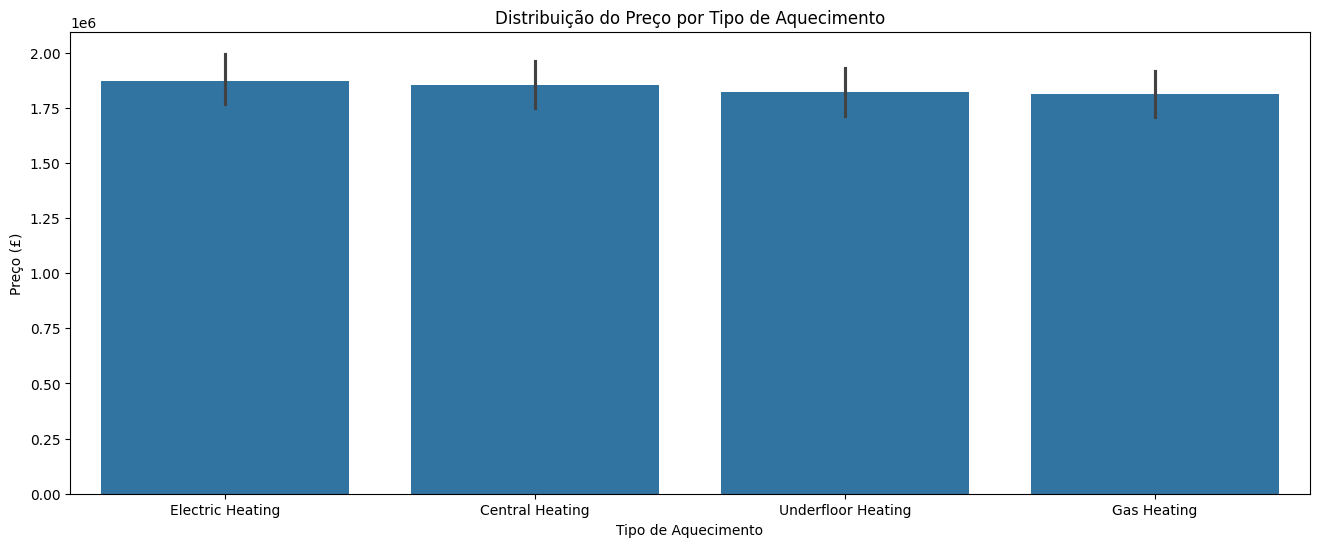

In [52]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Tipo Aquecimento", y="Preco (£)", data=df, estimator=np.mean)  
plt.title("Distribuição do Preço por Tipo de Aquecimento")
plt.xlabel("Tipo de Aquecimento")
plt.ylabel("Preço (£)")
plt.show()

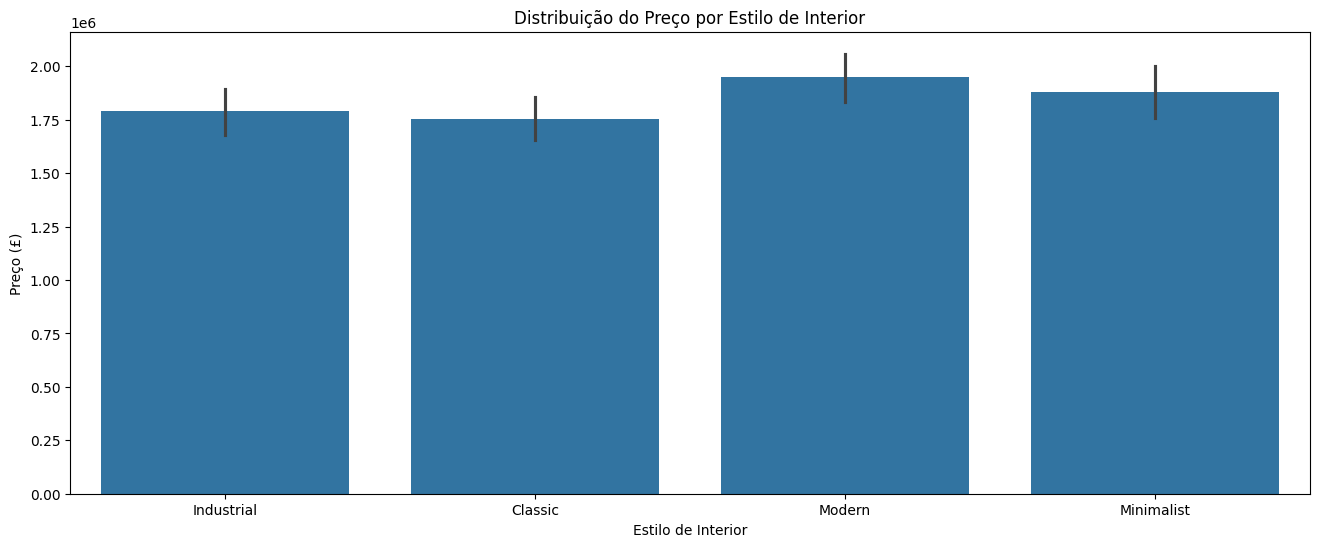

In [53]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Estilo Interior", y="Preco (£)", data=df, estimator=np.mean)  
plt.title("Distribuição do Preço por Estilo de Interior")
plt.xlabel("Estilo de Interior")
plt.ylabel("Preço (£)")
plt.show()